In [1]:
# importing some necessary packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import os
import us
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
colors = ['red', 'blue', 'green']
def plot_top3(colors, top3_list, df,minCases =25, maxCases=100000, sample=10):
    
    for i, county in enumerate(top3_list):
        
        selectCounty = df[df['county'] == county]
        inRange = selectCounty[(selectCounty['cases'] > minCases)
                               & (selectCounty['cases'] <= maxCases)]
        
        
        colTitle = 'Days since ' + str(minCases) + 'th Case'
        inRange[colTitle] = np.arange(len(inRange))
        inRange_sample = inRange.sample(sample)

        
        fig2, ax2 = plt.subplots(figsize = (10,8))
        inRange_sample.plot(x=colTitle, y = 'cases',
                    kind='scatter', legend=county, ax=ax2,
                    s=15.0, color=colors[i])
        plt.xticks(size=13)
        plt.yticks(size=13)
        plt.xlabel(xlabel= colTitle, fontsize=20)
        plt.ylabel(ylabel= 'Cases', fontsize=20)
        title =  myState +  ' COVID-19 cases for ' +  county + ' county'
        plt.title(title, fontsize=20)
        plt.axhline(y=minCases, color='magenta', linestyle='--')
        legTitle = 'y = ' + str(minCases) + ' Cases'
        plt.legend([legTitle, 'Cases Recorded on given Day'],
                  prop={'size': 15})

In [3]:
# get the right estimate for how many cases there is in those counties

def estimateCases(counties):
    """
    This function estimates the number
    of cases in the given list of counties.
    top 3 cases usually.
    --------------------------------------
    Input:
        counties = list of county names
    Output:
        num = bounding number
    """
    maxCases = []
    minCases = []
    
    for c in top3_housingMIN:
        a = perSTATE[perSTATE['county'] == c]
        numCasesMAX = a['cases'].max()
        numCasesMIN = a['cases'].min()
        maxCases.append(numCasesMAX)
        minCases.append(numCasesMIN)
    
    numMAX = max(maxCases)
    numMIN = min(minCases)
    
    return numMAX, numMIN

In [4]:
# ------------ RUN THIS CELL ---------
# Obtaining datasets
us_list = sorted(glob.glob('../data/*.zip'))
us_countiesDailyPlus = pd.read_csv(us_list[0])

In [5]:
# ------------ RUN THIS CELL ---------
us_countiesDailyPlus = us_countiesDailyPlus[us_countiesDailyPlus.state != 'Virgin Islands']
us_countiesDailyPlus = us_countiesDailyPlus[us_countiesDailyPlus.state != 'Northern Mariana Islands']

# What does the Dataset look like?
Each of the rows below depicts a recorded day with information on COVID cases at the county level.
The columns contain information on the number cases, deaths, etc recorded for that day. We also have information such as when the stay at home order was announced and effective.

In [6]:
# ------------ RUN THIS CELL ---------
# this shows us the first 5 rows in our dataset
us_countiesDailyPlus.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23


**How many counties are there?**

In [7]:
# ------------ RUN THIS CELL ---------
countyNUM = len(np.unique(us_countiesDailyPlus['county']))
statesNUM= len(np.unique(us_countiesDailyPlus['state']))
print('There are ', countyNUM, " counties recorded from ", statesNUM, " states.")
print('_'*53)
print(' ')
print('Note there are 52 states because we are including DC and Puerto Rico.')

There are  1924  counties recorded from  52  states.
_____________________________________________________
 
Note there are 52 states because we are including DC and Puerto Rico.


# Let's Analyze a State and County
In the cell below write in the state and county you would like to explore.
- Your selected state goes in the variable named `myState`
- Your selected county goes in the variable named `myCounty`

Make sure you type the complete name of the selected state and not the abbreviated name (e.g. 'California' and not 'CA'). Also note that string values in python are case sensitive. 

In [8]:
# ----------- YOUR WORK HERE ---------
# WRITE YOUR STATE HERE once finished run this cell
myState = 'California' # <---- YOUR CODE HERE

Let's examine what are the avaialble counties in the selected state before you select your county of interest.

In [9]:
# ------------ RUN THIS CELL ---------
# let's focus on your selected state 
perSTATE = us_countiesDailyPlus[us_countiesDailyPlus['state'] == myState]

In [10]:
# ------------ RUN THIS CELL ---------
which_counties = np.unique(perSTATE['county'])

counties = []
for c in which_counties:
    counties.append(c)
 
countyFrame = pd.DataFrame()    
countyFrame['Counties in this State'] = counties
countyFrame

,Counties in this State
0,Alameda
1,Alpine
2,Amador
3,Butte
4,Calaveras
5,Colusa
6,Contra Costa
7,Del Norte
8,El Dorado
9,Fresno


## What is your County of interest?
Type your desired county below next to the `myCounty` variable: (Complete name and case sensitive e.g. 'Alameda' and not 'alameda'.)

In [11]:
# ----------- YOUR WORK HERE ---------
# type your county and run this cell
myCounty = 'Alameda' # <---- YOUR CODE HERE

## Number of cases in your selected location
In this notebook we will analyze how the COVID-19 cases in your selected location (county given state) evolved last year. Note that the dates depicted below will run from mid-March to early December of 2020.
- Can you figure out what is the best function to fit the data?
- Note that:
    - X-axis = # of days since 25th case until just below the 400,000th case.
    - Y-axis = # of cases recorded in (x) day

*If you're curious...(line by line description)*
1. The cell below removes all columns available in the data except for `date`, `county`, and `cases` (this minimizes the memory used for your notebook to run).
2. Simplifies the data to whenever the 25th case was detected all the way up to (and including) ']' the 400,000th case.
3. Since there are many counties in the data, we want to analyze only a single county in the state (your selected county, `myCounty`.

In [12]:
# ------- RUN THIS CELL ---------
casesONLY = perSTATE[['date', 'county', 'cases']]
casesONLY = casesONLY[(casesONLY['cases'] >= 25) & (casesONLY['cases'] <= 400000)]
byCounty = casesONLY.groupby('county')

# get selected county
thisCounty = byCounty.get_group(myCounty)
thisCounty['Days since 25th Case'] = np.arange(len(thisCounty))
thisCounty = thisCounty.sample(50) # note I am only sampling 50 data points because of desmos limitations

/Users/mirasilvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Let's visualize the number of cases since the 25th case in your location.

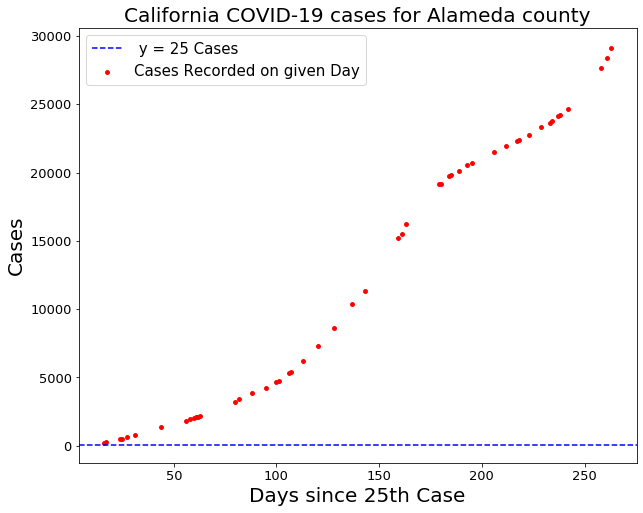

In [13]:
# --------- RUN THIS CELL TO SEE GRAPH ----------
fig, ax = plt.subplots(figsize = (10,8))
thisCounty.plot(x='Days since 25th Case', y = 'cases',
                kind='scatter', legend='county', ax=ax,
                s=15.0, color='red')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel(xlabel= 'Days since 25th Case', fontsize=20)
plt.ylabel(ylabel= 'Cases', fontsize=20)
title =  myState +  ' COVID-19 cases for ' +  myCounty + ' county'
plt.title(title, fontsize=20)
plt.axhline(y=25, color='blue', linestyle='--')
plt.legend([' y = 25 Cases', 'Cases Recorded on given Day'],
          prop={'size': 15})

# Exercise 1
1. Extract 50 datapoints from the plot above and fit the data in Desmos.
    - Run the cell below to obtain the .csv file which you can copy paste the coordinates from to paste into Desmos.
2. Answer the questions below once you are finished.

**Questions**
1. What is the function that approaximates your data?
2. What can you tell me about the curvy aspects of the plotted data?
3. Why isn't a uniform increase or decrease?

**Your Answers Here**

    1.
    
    2.
    
    3.

----------------------------------------------------------------------------------------------------------

# Let's Keep exploring the selected State


## How does housing affect the number of COVID-19 cases?
Analyzing the counties with the highest `percentage_severe_housing_problems`

**A. What are the top 3 counties with the highest percentage of housing problems in the state?**

In [14]:
# ------ RUN THIS CELL TO FIND OUT! -------
housing = perSTATE.sort_values(by='percent_severe_housing_problems', ascending=False, na_position='last')
top3_housing = housing['county'].unique()[:3]

print('The top 3 counties in ', myState, " with the highest % of housing problems are: ")
print('----------'*8)
for county in top3_housing:
    print(county)

The top 3 counties in  California  with the highest % of housing problems are: 
--------------------------------------------------------------------------------
Los Angeles
Monterey
Santa Barbara


**B. Let's inspect these counties closer, particularly how fast they got from 25 cases to 100,000 cases.**

/Users/mirasilvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


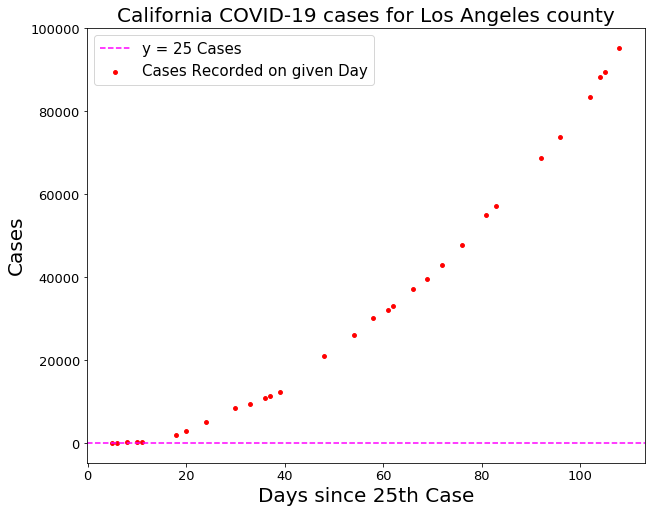

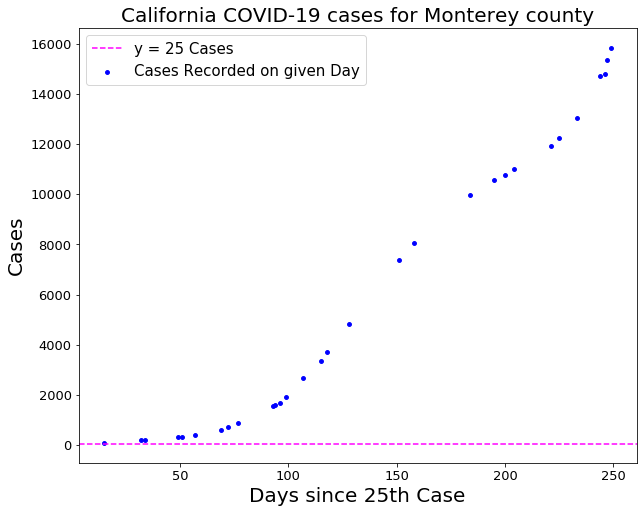

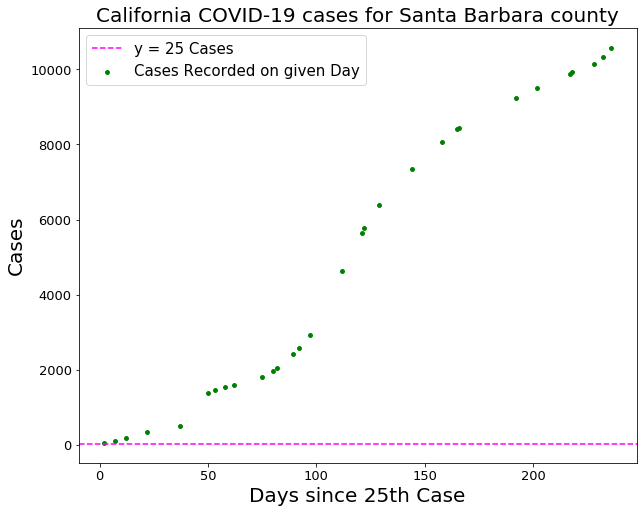

In [15]:
# ------ RUN THIS CELL! -------
severeCounties = perSTATE.loc[housing['county'].isin(top3_housing)]
plot_top3(colors, top3_housing, severeCounties, sample=30)

**C. But what about those counties with the lowest percentage of housing problems?**

In [16]:
# ------ RUN THIS CELL TO FIND OUT! -------
housingMIN = perSTATE.sort_values(by='percent_severe_housing_problems', ascending=True, na_position='last')
top3_housingMIN = housingMIN['county'].unique()[:3]

print('The top 3 counties in ', myState, " with the LOWEST % of housing problems are: ")
print('---------'*8)
for county in top3_housingMIN:
    print(county)

The top 3 counties in  California  with the LOWEST % of housing problems are: 
------------------------------------------------------------------------
Sierra
Mono
Lassen


**Let's inspect these counties closer, particularly how fast they got from 25 cases to their highest number of cases.**

/Users/mirasilvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


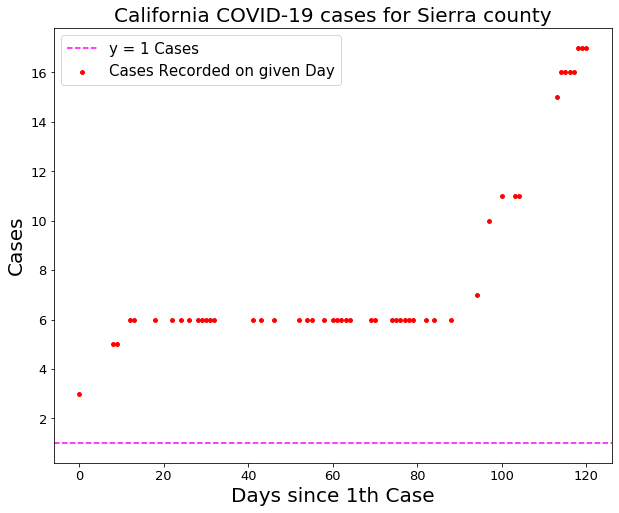

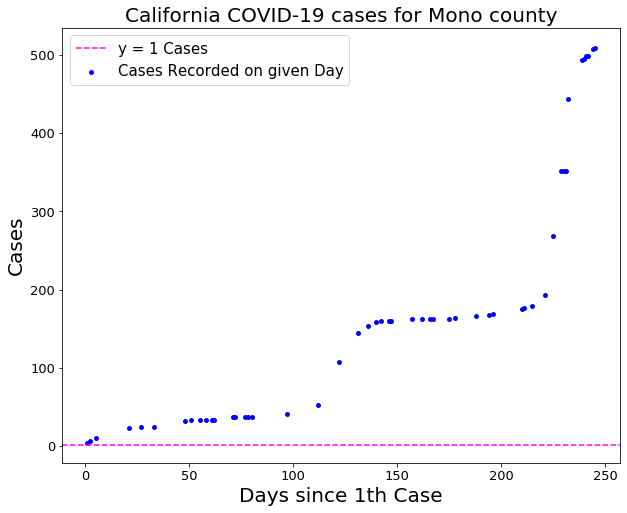

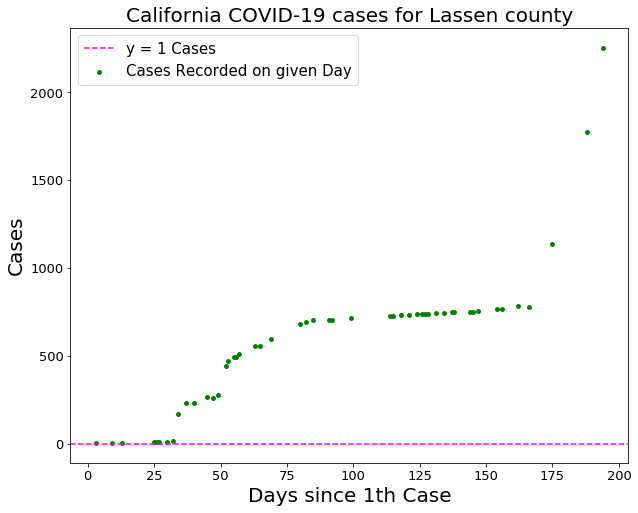

In [17]:
# ------ RUN THIS CELL! -------
boundMAX, boundMIN = estimateCases(top3_housingMIN)
min_housingCounties = perSTATE.loc[housingMIN['county'].isin(top3_housingMIN)]
plot_top3(colors, top3_housingMIN, min_housingCounties,minCases=boundMIN, maxCases=boundMAX, sample=50)

## Exercise 2
Answer the following questions:

1. When you compare the top 3 counties with the highest percentage of housing problems vs the counties with the least amount, what can you infer about the transmission about either group?
2. Give an explanation about the differing axis in two contrasting counties (e.g. Los Angeles vs Sierra County).

YOUR ANSWERS HERE:

1.

2.

3.

## How does Population really affect transmission?

YOUR RESEARCH AND SOURCES HERE.

----------------------------------------------------------------------------------------------------------

# Life Expectancy and COVID-19 Deaths in State

**Does a higher life expectancy lead to less COVID-19 related deaths?**

**A. Which are the counties with the highest life expectancy?**

In [18]:
expectSORT= perSTATE.sort_values(by='life_expectancy', ascending=False)

top10 = expectSORT['county'].unique()[:10]
life = perSTATE.loc[expectSORT['county'].isin(top10)]
life = life[['county', 'deaths', 'life_expectancy']]
life = life.sort_values(by='life_expectancy', ascending=False)

dic={}
for j in top10:
    expect = life[life['county']==j]['life_expectancy'].values[0]
    dic[j] = expect
df_life = pd.DataFrame.from_dict(dic, orient='index', columns=['Highest Life Expectancy in Counties'])
df_life

,Highest Life Expectancy in Counties
Mono,96.522968
Marin,85.356241
San Mateo,84.742822
Santa Clara,84.630828
San Francisco,83.792758
Orange,83.105150
Alameda,82.876237
Santa Cruz,82.825500
Monterey,82.502977
Ventura,82.472556


**B. Can we really assume less deaths for the counties with a higher life expectancy?**

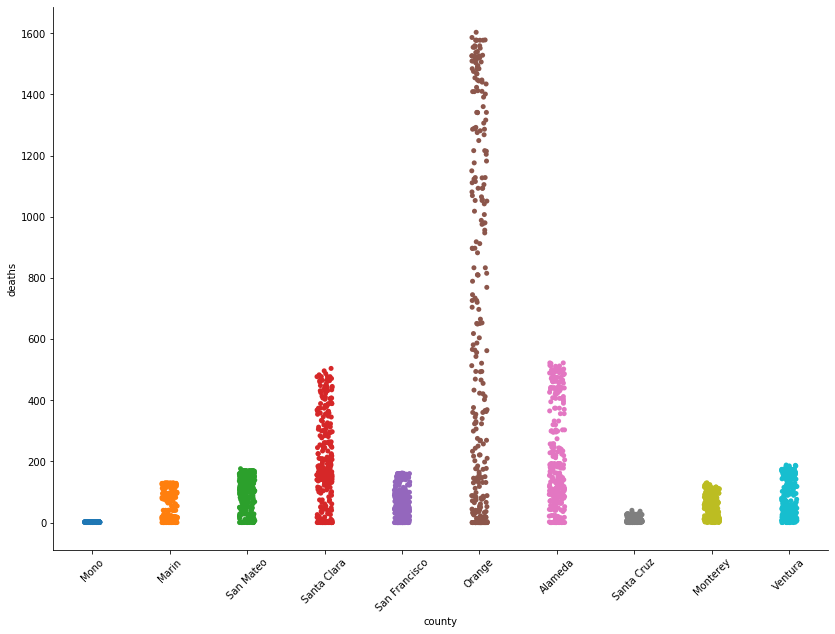

In [19]:
sns.catplot(x='county', y='deaths', data=life, height=8.27, aspect=11.7/8.27)
ax= plt.gca()
ax.set_xticklabels(top10, rotation = 45);

**C. What when we compare to all counties in the state?**

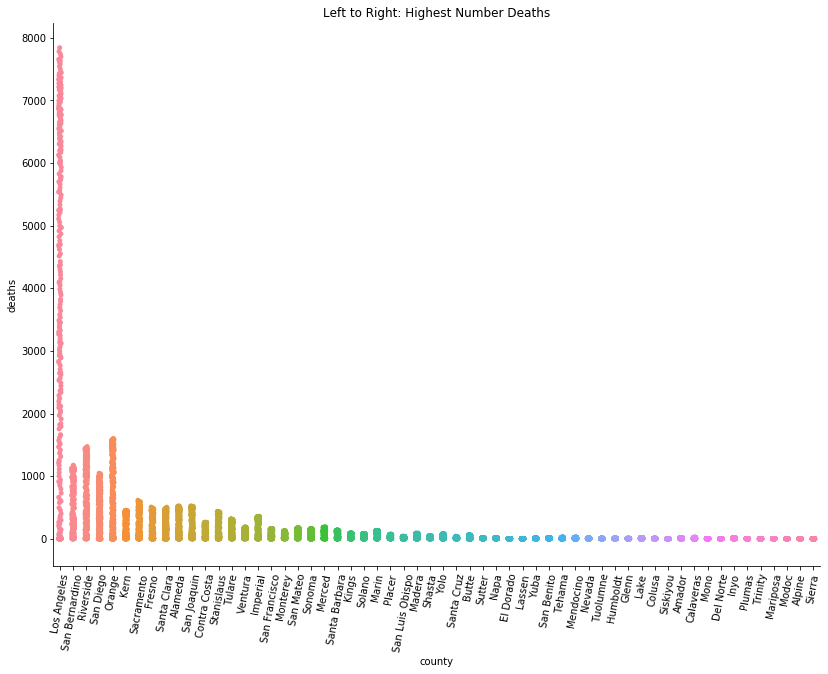

In [20]:
allCounties = perSTATE.sort_values(by=['cases', 'deaths'], ascending=False)
allCounties = allCounties[['county','cases','deaths', 'life_expectancy']]
countyNames = allCounties.county.unique()[:]
sns.catplot(x='county', y='deaths', data=allCounties, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(countyNames, rotation = 80);
plt.title('Left to Right: Highest Number Deaths');

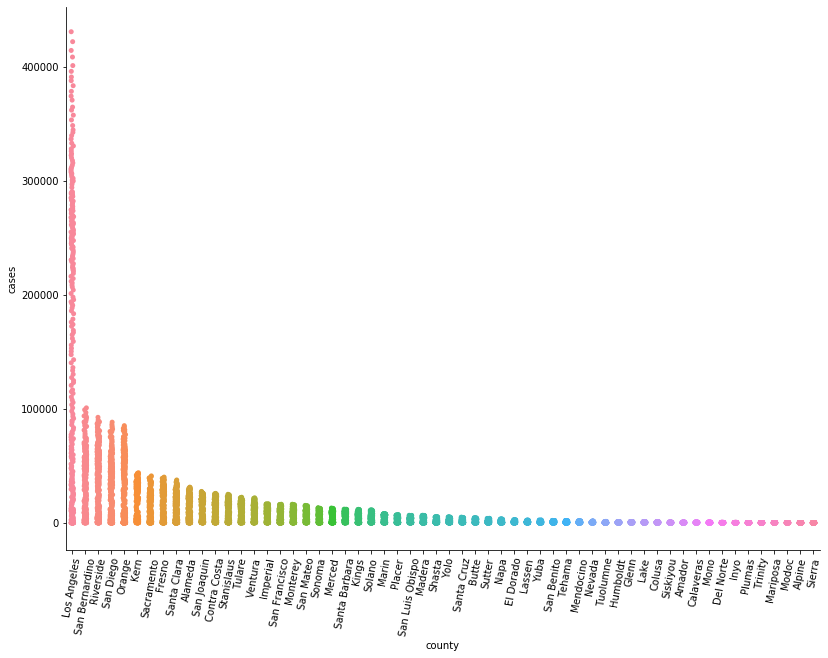

In [21]:
sns.catplot(x='county', y='cases', data=allCounties, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(countyNames, rotation=80);

## Minorities and COVID-19 Cases
Comparing the number of cases with the counties of higher percentage of minorities vs the lowest.

In [22]:
high_minority = perSTATE.sort_values(by='percent_minorities', ascending=False)
high_minorityTOP = high_minority['county'].unique()[:5]
min_minority = perSTATE.sort_values(by='percent_minorities', ascending=True)
min_minorityTOP = min_minority['county'].unique()[:5]

df1 = perSTATE.loc[high_minority['county'].isin(high_minorityTOP)][['date','county','cases', 'percent_minorities']]
df2 = perSTATE.loc[min_minority['county'].isin(min_minorityTOP)][['date', 'county', 'cases', 'percent_minorities']]

In [23]:
bhigh1, bhigh2 = estimateCases(high_minorityTOP)
blow1, blow2 = estimateCases(min_minorityTOP)
colors2 = ['red', 'blue','coral', 'green', 'darkorange']

/Users/mirasilvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


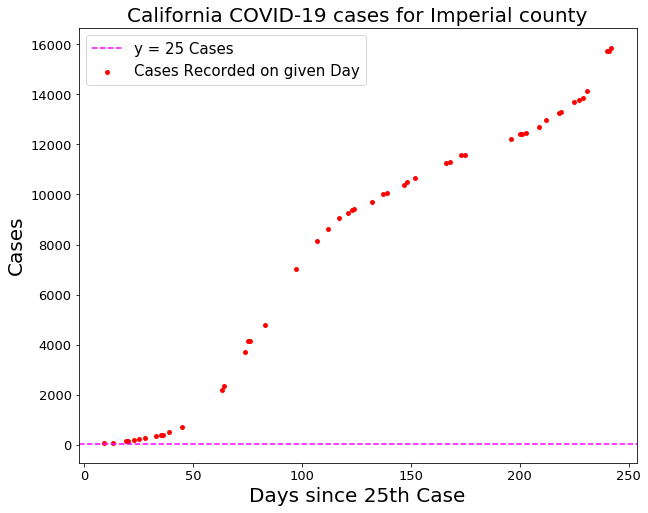

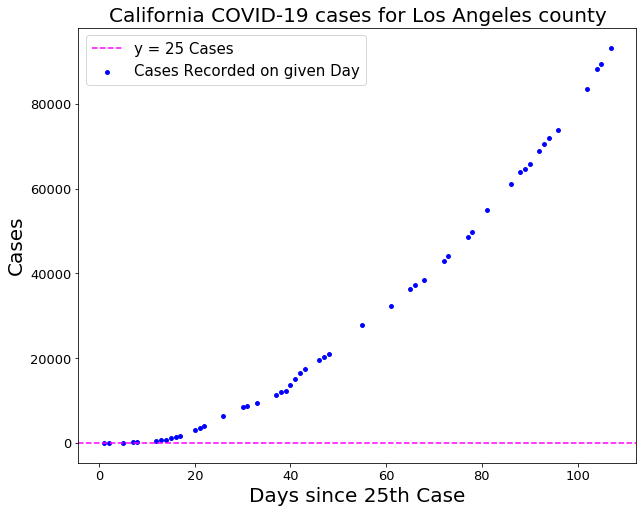

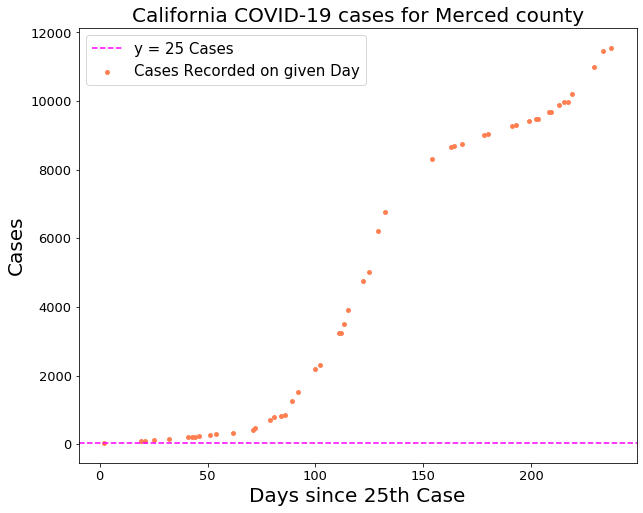

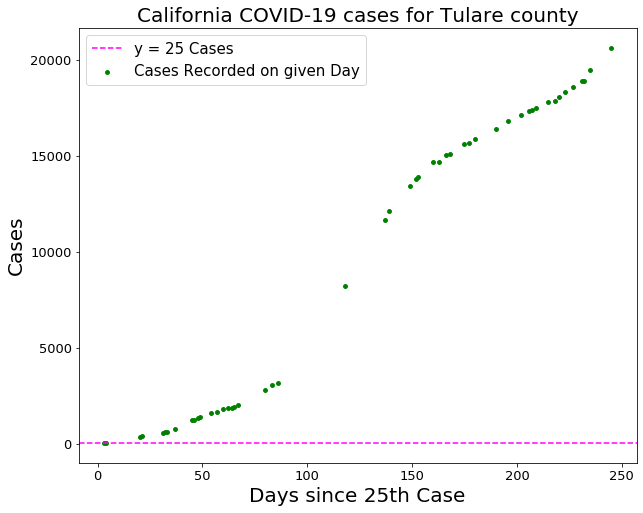

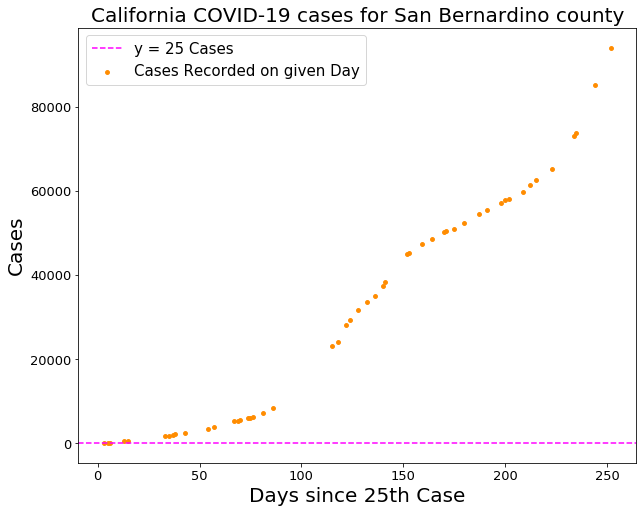

In [24]:
plot_top3(colors2, high_minorityTOP, df1, sample=50)

1

/Users/mirasilvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


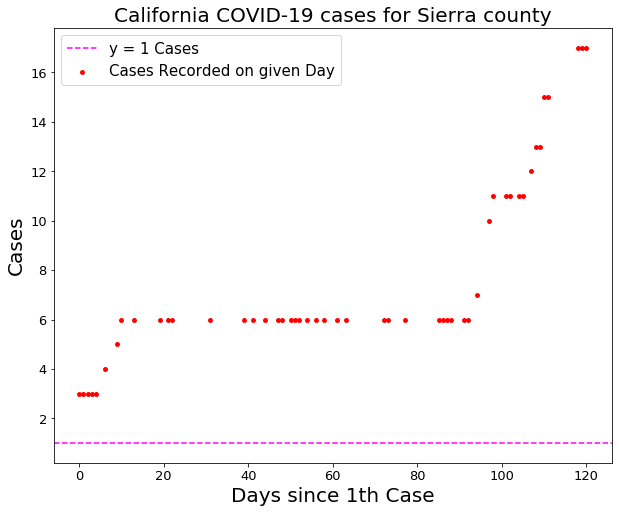

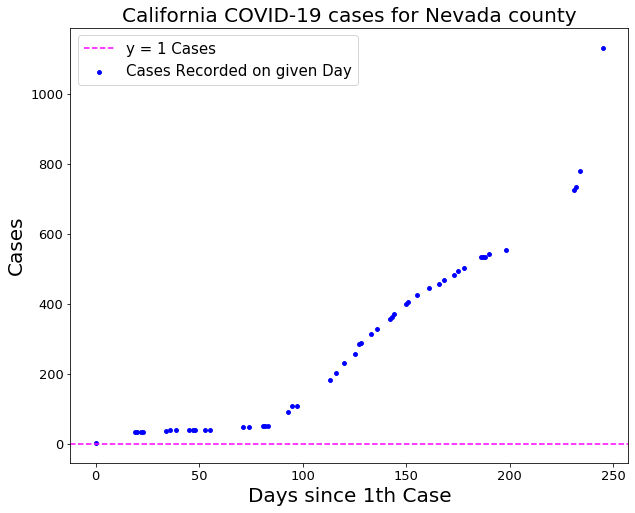

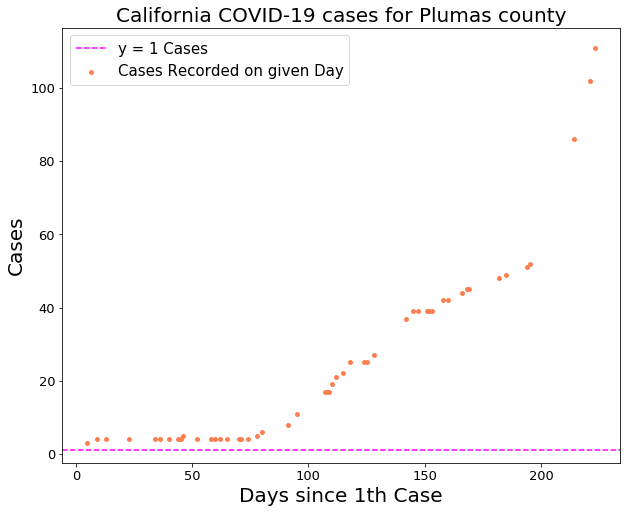

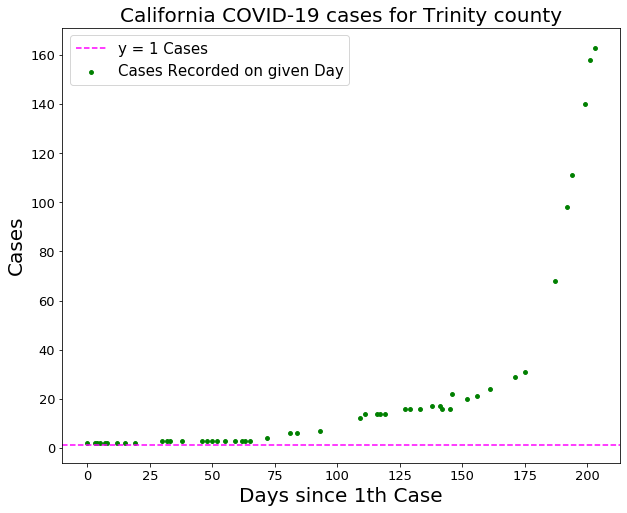

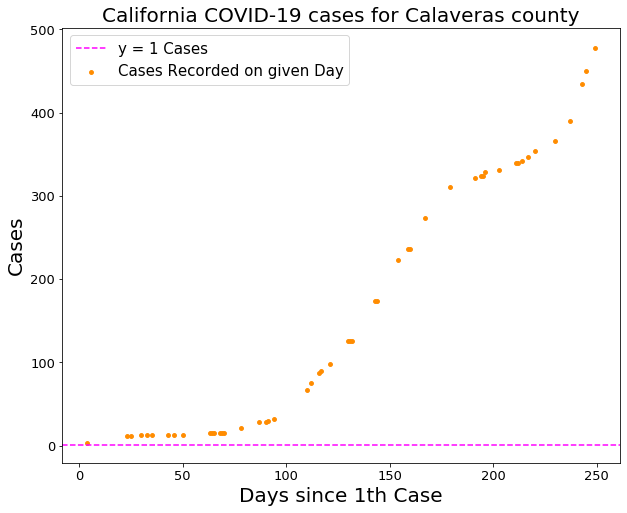

In [36]:
plot_top3(colors2, min_minorityTOP,df2, minCases=blow2, maxCases=blow1, sample=50)

In [ ]:
# ------ RUN THIS CELL! -------
boundMAX, boundMIN = estimateCases(top3_housingMIN)
min_housingCounties = perSTATE.loc[housingMIN['county'].isin(top3_housingMIN)]
plot_top3(colors, top3_housingMIN, min_housingCounties,minCases=boundMIN, maxCases=boundMAX, sample=50)

In [ ]:
df1

In [ ]:
df2

1. ~Find the areas with the highest percentage of sever housing problems. Define these and compare in relation to cases.~
2. ~Life expectancy to number of dates in relation to high risk people? (drop NA's)~
3. ~Median housing income (lowest) in relation to the number of cases (find lowest in counties) (or per capita income?)~ Not a relevant fact, low income is also for low population, hence less infection.
    1. ~Do this per state~
4. ~County analysis given the `percent_65_and_over` in relation to cases (per day? per county?) or `num_65_and_older`~
5. `percent_minorities` counties with highest number in relation to cases (top 3)
6. `percent_multi_unit_housing` in relation to cases, highest number.
7. `num_insured` in relation to cases, did the number change at all as the pandemic went on?

# Exercise 2

In [ ]:
perSTATE['life_expectancy']

Good questions to answer
1. `num_households_CHR` How many cases according to the number of households?
2. `percent_severe_housing_problems` Is there more cases in the states with higher rates?
3. `severe_housing_cost_burden` Same kind of question above---not sure what these numbers mean.**
4. `overcrowding` What are the values here? *****
5. `inadequate facilities` What are the values here too?*****
6. `life_expectancy` How do the cases show depending on the life expectancy?
7. `median_household_income` Can income be a factor of the number of cases?
8. `percent_65_and_over` How are cases in relation to this age?
9. `percent_less_than_18_years_of_age` Same idea as above.
10. `per_capita_income` Income and cases
11. `num_age_65_and_older`
12. `num_age_17_and_younger`
13. `num_minorities`
14. `percent_minorities`
15. `percent_multi_unit_housing`
16. `percent_overcrowding`
17. `mean_temp`
18. `fog`
19. `date_stay_at_home_announced`
20. `date_stay_at_home_effective`
21. `stay_at_home_announced`
22. `state_at_home_effective`
23.  `total_population`
24. `population_density_per_sqmi`
25. `num uninsured`
26. `percent_uninsured`
27. `percent_adults_with_obesity`
28. `percent_with_access_to_exercise_opportunities`

In [ ]:
x